In [1]:
locations = [
    [18,54],[87,76],[74,78],[71,71],[25,38],
    [58,35],[4,50],[13,40],[18,40],[24,42],
    [71,44],[64,60],[68,58],[83,69],[58,69],
    [54,62],[51,67],[37,84],[41,94],[2,99],
    [7,64],[22,60],[25,62],[62,32],[87,7],
    [91,38],[83,46],[41,26],[45,21],[44,35]
]

In [2]:
import numpy as np

def dist_cal(x,y):
    return ((x[0]-y[0])**2+(x[1]-y[1])**2)**0.5
#距离矩阵
dist_mat = np.zeros((30,30))
for i in range(0,30):
    for j in range(i+1,30):
        tmp = dist_cal(locations[i],locations[j])
        dist_mat[i][j] = tmp
        dist_mat[j][i] = tmp

In [3]:
import math
#目标函数
def target_fuc(order):
    global dist_mat
    sum_dist = 0
    for i in range(1,len(order)):
       sum_dist += dist_mat[order[i]][order[i-1]]
    return sum_dist

#适应度函数
def fitness(dist):
    m,me = max(dist)-min(dist),sum(dist)/len(dist)
    def sigmoid(x):
        return 1/(1+math.exp(5*x))
    temp = map(lambda x:(x-me)/m,dist)
    fit_values = [sigmoid(i) for i in temp]
    return fit_values

In [4]:
import random
#实现选择操作
def choice(target_values,Np,pd):
    #轮盘赌的实现
    re = copy.deepcopy(target_values)
    i = 0
    while len(re)/Np > pd:
        k = random.random()
        for i in re:
            if i<k:
                re.remove(i)
    return [target_values.index(item) for item in re]

In [5]:
#实现交叉操作函数
import copy
def op(l1,l2):
    len_v = len(l1)
    oops = random.randint(0,len_v-3)
    for t in range(oops,oops+len_v//10):
        elem1 = l1[t]
        elem2 = l2[t]
        k = l1.index(elem2)
        l1[t] = l2[t]
        l2[t] = l2[k]
        l2[k] = l1[k]
        l1[k] = elem1
def change(pc,target_exam):
    target_vecs = copy.deepcopy(target_exam)
    nums = 0
    len_t = len(target_vecs)
    #交叉操作以及映射
    #对选中的P群体进行交叉操作
    for i in range(len_t-1):
        for j in range(i+1,len_t):
            k = random.random()
            if k > pc:
                continue
            op(target_vecs[i],target_vecs[i+1])
    return target_vecs

In [6]:
#实现变异操作
def mutate(pm,target_data):
    target = copy.deepcopy(target_data)
    len_v = len(target)
    for i in range(len_v):
        k = random.random()
        if k > pm:
            continue
        id1 = random.randint(0,len_v-1)
        id2 = random.randint(0,len_v-1)
        temp = target[id1]
        target[id1] = target[id2]
        target[id2] = temp
    return target

In [7]:
#随机初始化种群
def rand_creat_group(Np,len_vec):
    res = []
    for i in range(Np):
        temp = []
        while len(temp)<len_vec:
            ite = random.randint(0,len_vec-1)
            if ite not in temp:
                temp.append(ite)
        res.append(temp)
    return res

In [8]:
Np = 200
pc = 0.4
pm = 0.01
pd = 0.35

In [9]:
#初始种群
group = rand_creat_group(Np,len(locations))

In [10]:
G = 1000
processing_array = dict()
min_path = list()
gmin = 1e5
len_vec = len(group[0])
group1 = group
while G>0:
    G -= 1
    #计算访问顺序总距离
    target_values = []
    for item in group1:
        tmp = target_fuc(item)
        target_values.append(tmp)
        #记录每次迭代的最优路径
        if gmin > tmp:
            gmin = tmp
            min_path.append(copy.deepcopy(item))
    fitness_values = fitness(target_values)
    #存放每一次迭代的结果
    processing_array[1000-G] = min(target_values)
    #根据适应值选取遗传个体
    choice_ids = choice(fitness_values,Np,pd)
    choice_group = list()
    for i in choice_ids:
        choice_group.append(group1[i])
    temp_group = copy.deepcopy(choice_group)
    #实现交叉遗传，并扩张种群
    temp_group += change(pc,choice_group)
    while len(temp_group)<Np:
        temp_group += copy.deepcopy(temp_group)
    temp_group = temp_group[:200]
    #对种群实现变异
    for i in range(len(temp_group)):
        temp_group[i] = mutate(pm,temp_group[i])
    group1 = copy.deepcopy(temp_group)

In [11]:
import matplotlib.pyplot as plt

In [12]:
generties = list(processing_array.keys())
dist_square = list(processing_array.values())

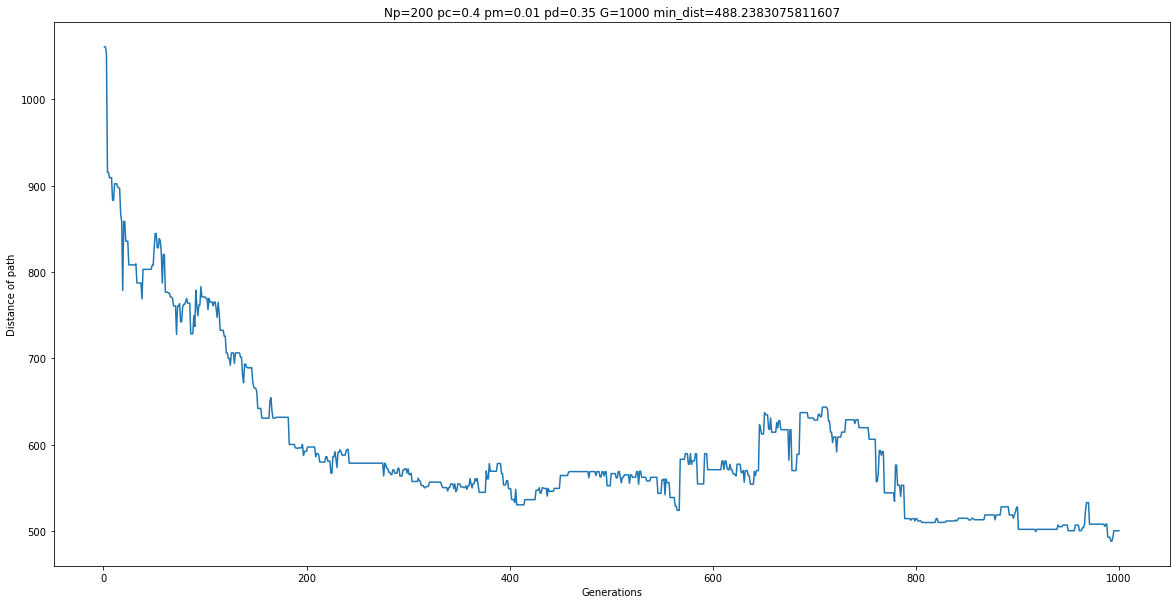

In [36]:
plt.rcParams['figure.figsize'] = (20,10)
plt.title('Np={} pc={} pm={} pd={} G={} min_dist={}'.format(Np,pc,pm,pd,1000,min(dist_square)))
plt.plot(generties,dist_square)
plt.xlabel('Generations')
plt.ylabel('Distance of path')
#plt.savefig('./result/{}_{}_{}_{}_{}_{}_5_blog.png'.format(Np,pc,pm,pd,100,2))

In [42]:
#将每次的最佳路径可视化图片保存制作gif
plt.rcParams['figure.figsize'] = (10,10)
j = 0
for item in min_path:
    j += 1
    x = [locations[i][0] for i in item]+[locations[item[0]][0]]
    y = [locations[i][1] for i in item]+[locations[item[0]][1]]
    fig = plt.figure(j)
    plt.plot(x,y)
    plt.savefig('./result/gif/{}.png'.format(j))
    plt.close(j)